<a href="https://colab.research.google.com/github/Tsetiawan2712/Football-Analysis/blob/main/Goalkeppers%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
! git clone https://github.com/statsbomb/open-data.git

Cloning into 'open-data'...
remote: Enumerating objects: 49843, done.
remote: Counting objects: 100% (229/229), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 49843 (delta 194), reused 223 (delta 194), pack-reused 49614
Receiving objects: 100% (49843/49843), 6.45 GiB | 24.40 MiB/s, done.
Resolving deltas: 100% (46849/46849), done.
Updating files: 100% (7246/7246), done.


In [21]:
import pandas as pd

competition = pd.read_json('open-data/data/competitions.json')
competition

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [33]:
import json

match_ids = []

with open('open-data/data/matches/55/282.json') as f:
    data = json.load(f)
    for i in data:
        print(i['match_id'], i['home_team']['home_team_name'], i['home_score'], '-', i['away_score'], i['away_team']['away_team_name'])
        match_ids.append(i['match_id'])

3942819 Netherlands 1 - 2 England
3943043 Spain 2 - 1 England
3942752 Spain 2 - 1 France
3942382 Netherlands 2 - 1 Turkey
3942349 Portugal 0 - 0 France
3930180 Netherlands 2 - 3 Austria
3930171 Denmark 1 - 1 England
3942227 England 1 - 1 Switzerland
3942226 Spain 2 - 1 Germany
3938645 Ukraine 0 - 0 Belgium
3930184 Czech Republic 1 - 2 Turkey
3941022 Austria 1 - 2 Turkey
3941021 Romania 0 - 3 Netherlands
3941020 Portugal 0 - 0 Slovenia
3941019 France 1 - 0 Belgium
3941018 Spain 4 - 1 Georgia
3941017 England 2 - 1 Slovakia
3930182 Denmark 0 - 0 Serbia
3930179 Albania 0 - 1 Spain
3940983 Germany 2 - 0 Denmark
3940878 Switzerland 2 - 0 Italy
3930177 Scotland 0 - 1 Hungary
3930173 Netherlands 0 - 0 France
3930172 Spain 1 - 0 Italy
3930167 Croatia 2 - 2 Albania
3930168 Germany 2 - 0 Hungary
3930165 Austria 0 - 1 France
3930164 Belgium 0 - 1 Slovakia
3930161 Italy 2 - 1 Albania
3938637 Poland 1 - 2 Netherlands
3938640 Slovakia 1 - 2 Ukraine
3938642 Georgia 1 - 1 Czech Republic
3938639 Turkey 

In [34]:
full_data = pd.DataFrame()

for match_id in match_ids:
    with open('open-data/data/events/' + str(match_id) + '.json') as f:
        data = json.load(f)

    temp = pd.json_normalize(data, sep='_')
    full_data = pd.concat([full_data, temp])

print(full_data.shape)
full_data.head()

(187858, 141)


,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,goalkeeper_success_in_play,dribble_no_touch,ball_recovery_offensive,pass_miscommunication,player_off_permanent,shot_follows_dribble,shot_saved_off_target,goalkeeper_shot_saved_off_target,goalkeeper_penalty_saved_to_post,shot_redirect
0,d7c4f4a8-77b9-40c5-8d81-f50b40355723,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e518d7a6-3360-4d94-aeef-661709bddf42,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fb2e0f15-aa3c-4a06-a11b-f16ae5804342,3,1,00:00:00.000,0,0,1,0.000000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75fd7777-ef15-4fdc-abb1-1349fef334c1,4,1,00:00:00.000,0,0,1,0.000000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25dfc952-7a85-464f-b884-982064d46cc9,5,1,00:00:00.355,0,0,2,2.455156,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
pass_data = full_data[full_data.position_name == 'Goalkeeper']

print(pass_data.shape)
pass_data.head()

(9363, 141)


,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,goalkeeper_success_in_play,dribble_no_touch,ball_recovery_offensive,pass_miscommunication,player_off_permanent,shot_follows_dribble,shot_saved_off_target,goalkeeper_shot_saved_off_target,goalkeeper_penalty_saved_to_post,shot_redirect
5,85328a9c-e246-4273-b566-353b64d902a1,6,1,00:00:02.810,0,2,2,NaN,42,Ball Receipt*,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,23b8ddd8-4daa-4dce-b4f3-fc40546b9a3f,7,1,00:00:02.810,0,2,2,2.483781,43,Carry,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8a920161-a913-4ce5-be61-9d6ae7466469,9,1,00:00:05.294,0,5,2,3.438864,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,803be2c1-0b6e-4a89-83fb-f4159ec3ab9c,59,1,00:01:22.518,1,22,5,NaN,42,Ball Receipt*,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,b85e567d-47cb-4614-b909-6d7a0ecacf2c,60,1,00:01:23.603,1,23,5,2.050302,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
pass_data = pass_data[pass_data.type_name == 'Pass']

print(pass_data.shape)
pass_data.head()

(3439, 141)


,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,goalkeeper_success_in_play,dribble_no_touch,ball_recovery_offensive,pass_miscommunication,player_off_permanent,shot_follows_dribble,shot_saved_off_target,goalkeeper_shot_saved_off_target,goalkeeper_penalty_saved_to_post,shot_redirect
8,8a920161-a913-4ce5-be61-9d6ae7466469,9,1,00:00:05.294,0,5,2,3.438864,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,b85e567d-47cb-4614-b909-6d7a0ecacf2c,60,1,00:01:23.603,1,23,5,2.050302,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,f831f898-9040-44b7-9b29-9d15bc1379b3,178,1,00:03:22.169,3,22,7,1.621643,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,544d38d0-60a5-4220-9841-75fe4838a723,200,1,00:03:51.391,3,51,8,3.941479,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,563dc56e-af58-403a-97c4-8f29009521ab,233,1,00:04:48.125,4,48,9,1.715131,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
pass_data = pass_data[['player_name', 'team_name', 'location', 'pass_end_location', 'pass_angle', 'pass_length']]
pass_data.head()

,player_name,team_name,location,pass_end_location,pass_angle,pass_length
8,Jordan Pickford,England,"[30.4, 24.1]","[89.2, 53.4]",0.462286,65.695740
59,Jordan Pickford,England,"[13.2, 32.3]","[25.2, 49.4]",0.958894,20.890429
177,Bart Verbruggen,Netherlands,"[8.6, 45.5]","[11.7, 75.7]",1.468506,30.358688
199,Jordan Pickford,England,"[11.7, 36.8]","[61.7, 3.4]",-0.588925,60.129528
232,Bart Verbruggen,Netherlands,"[6.5, 46.0]","[11.7, 32.4]",-1.205595,14.560220


In [38]:
pass_data['x'] = pass_data.location.apply(lambda x: x[0])
pass_data['y'] = pass_data.location.apply(lambda x: x[1])
pass_data['x_end'] = pass_data.pass_end_location.apply(lambda x: x[0])
pass_data['y_end'] = pass_data.pass_end_location.apply(lambda x: x[1])

pass_data_clean = pass_data.drop(['location', 'pass_end_location'], axis=1)
pass_data_clean.head()

,player_name,team_name,pass_angle,pass_length,x,y,x_end,y_end
8,Jordan Pickford,England,0.462286,65.695740,30.4,24.1,89.2,53.4
59,Jordan Pickford,England,0.958894,20.890429,13.2,32.3,25.2,49.4
177,Bart Verbruggen,Netherlands,1.468506,30.358688,8.6,45.5,11.7,75.7
199,Jordan Pickford,England,-0.588925,60.129528,11.7,36.8,61.7,3.4
232,Bart Verbruggen,Netherlands,-1.205595,14.560220,6.5,46.0,11.7,32.4


In [39]:
X = pass_data_clean[['x', 'y', 'x_end', 'y_end', 'pass_angle', 'pass_length']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

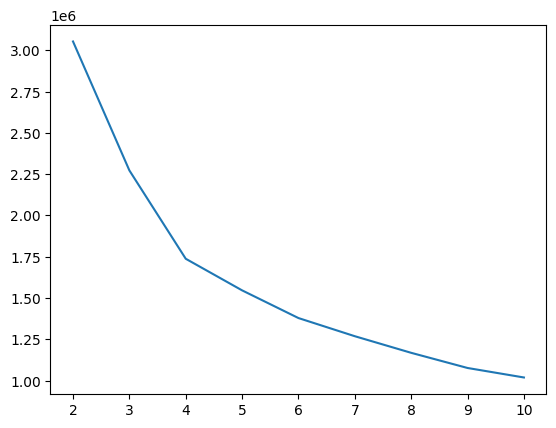

In [40]:
### EXPLORE OPTIMAL MODELS
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

n = list(range(2, 11))
errors = []

for i in range(2, 11):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(X)
    errors.append(model.inertia_)

plt.plot(n, errors)

In [41]:
### 6 IS THE OPTIMAL NUMBER OF CLUSTERS
model = KMeans(n_clusters=6, random_state=42)
model.fit(X)

pass_data_clean['cluster'] = model.labels_
pass_data_clean.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,player_name,team_name,pass_angle,pass_length,x,y,x_end,y_end,cluster
8,Jordan Pickford,England,0.462286,65.695740,30.4,24.1,89.2,53.4,3
59,Jordan Pickford,England,0.958894,20.890429,13.2,32.3,25.2,49.4,1
177,Bart Verbruggen,Netherlands,1.468506,30.358688,8.6,45.5,11.7,75.7,1
199,Jordan Pickford,England,-0.588925,60.129528,11.7,36.8,61.7,3.4,4
232,Bart Verbruggen,Netherlands,-1.205595,14.560220,6.5,46.0,11.7,32.4,5


In [44]:
pip install mplsoccer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.1/80.1 kB 2.0 MB/s eta 0:00:00


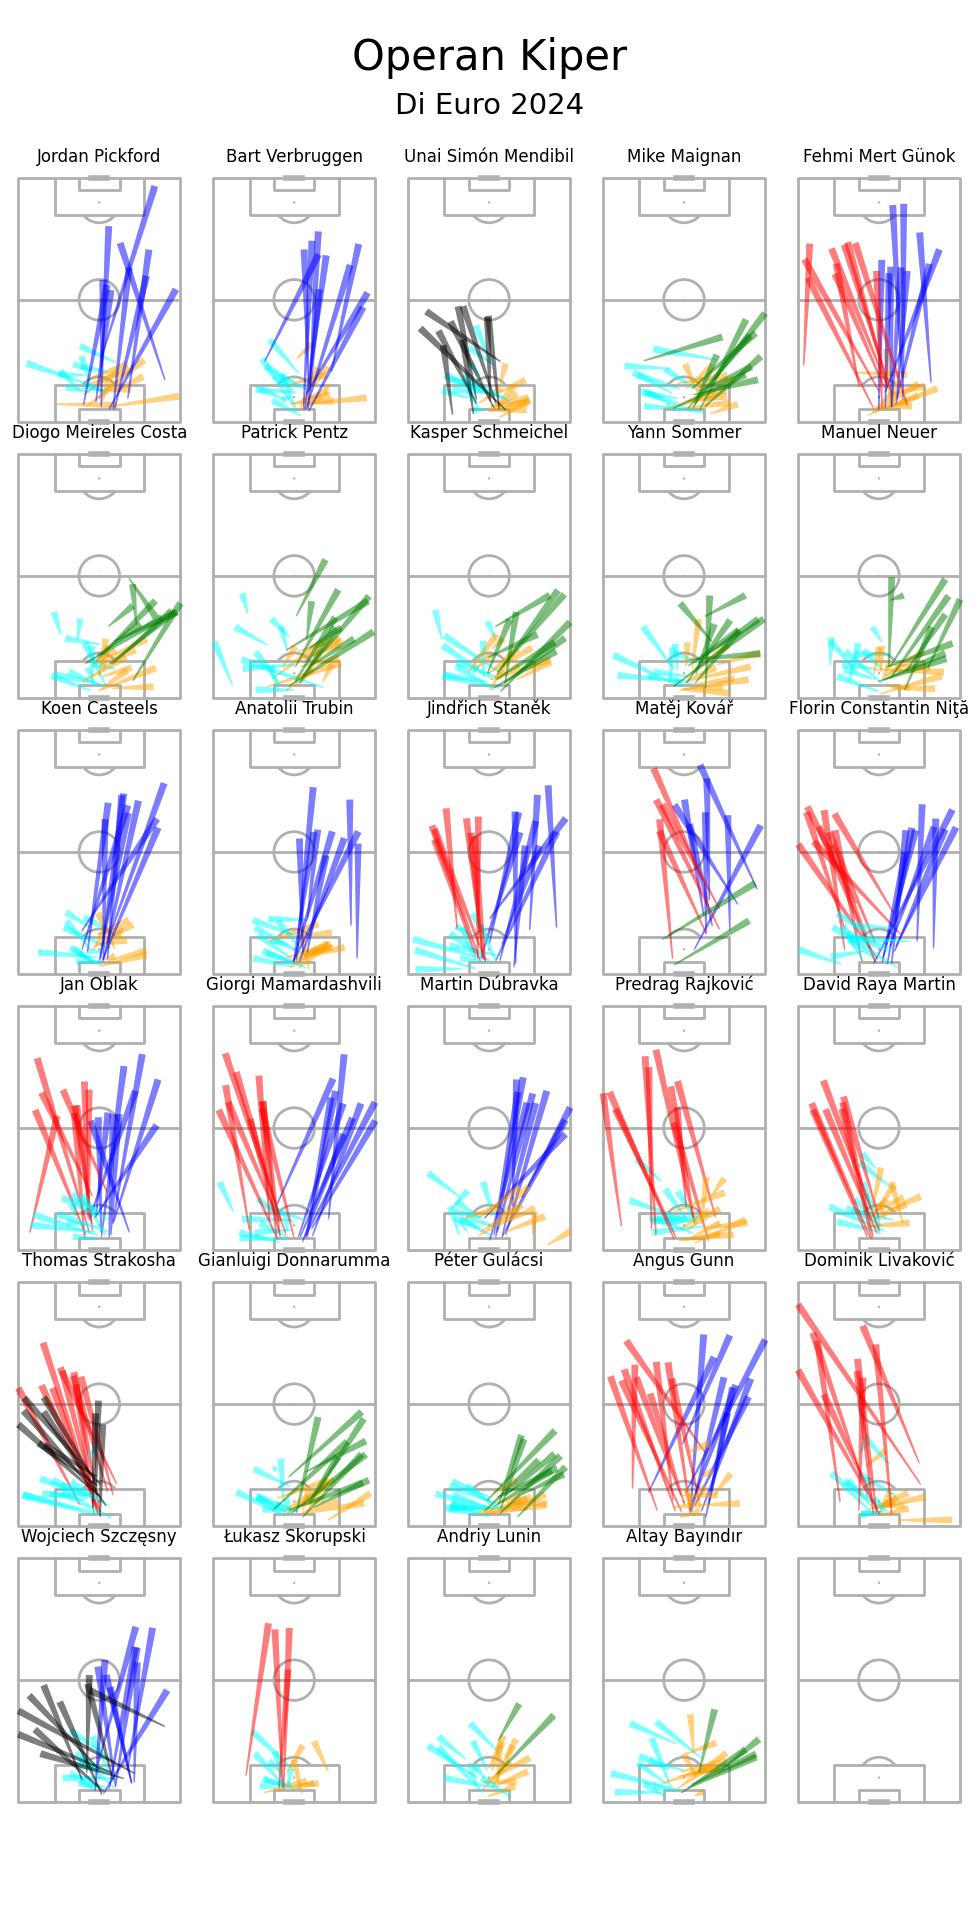

In [47]:
from mplsoccer import VerticalPitch

player_names = pass_data_clean.player_name.unique()
colors = ['red', 'orange', 'green', 'blue', 'black', 'cyan' , 'yellow']

pitch = VerticalPitch(pitch_type='statsbomb')
fig, axs = pitch.grid(figheight=20, nrows=6, ncols=5,
                      title_height=0.08, endnote_space=0,
                      title_space=0, grid_height=0.82,
                      endnote_height=0.05, axis=False)

# Iterate through players
for i, ax in enumerate(axs['pitch'].flatten()):

    # To Avoid Overlapping
    if i < len(player_names):
        temp = pass_data_clean[pass_data_clean.player_name == player_names[i]]
        top_3_clusters = temp.groupby(['player_name', 'cluster']).count().reset_index().sort_values('team_name', ascending=False).reset_index().cluster[:3].tolist()

        # Iterate through clusters
        for j in top_3_clusters:
            temp_cluster = temp[temp.cluster == j]

            # In case # of data are less than 10
            if temp_cluster.shape[0] > 10:
                temp_cluster = temp_cluster.sample(10, random_state=42)

            # Visualize the lines of passes
            lines = pitch.lines(temp_cluster.x, temp_cluster.y,
                                temp_cluster.x_end, temp_cluster.y_end,
                                color=colors[j], alpha=0.3, comet=True, ax=ax)
            ax.title.set_text(player_names[i])

axs['title'].text(0.5, 0.7, 'Operan Kiper',
                 va='center', ha='center', fontsize=30)
axs['title'].text(0.5, 0.4, 'Di Euro 2024',
                 va='center', ha='center', fontsize=21)

fig.savefig('goalkeepers-clusters_2024.jpeg', bbox_inches='tight')
plt.show()